In [1]:
import pandas as pd
import numpy as np
import tweepy

In [2]:
def printtweetdata(n, ith_tweet):
    print()
    print(f"Tweet {n}:")
    print(f"Username:{ith_tweet[0]}")
    print(f"Description:{ith_tweet[1]}")
    print(f"Location:{ith_tweet[2]}")
    print(f"Following Count:{ith_tweet[3]}")
    print(f"Follower Count:{ith_tweet[4]}")
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Retweet Count:{ith_tweet[6]}")
    print(f"Tweet Text:{ith_tweet[7]}")
    print(f"Hashtags Used:{ith_tweet[8]}")

In [3]:
def scrape(words, numtweet):
    db = pd.DataFrame(columns=['username',
                            'description',
                            'location',
                            'following',
                            'followers',
                            'totaltweets',
                            'retweetcount',
                            'text',
                            'hashtags'])
    tweets = tweepy.Cursor(api.search_tweets, q=words+" -filter:retweets", lang="en").items(numtweet)
    list_tweets = [tweet for tweet in tweets]
    i = 1


    for tweet in list_tweets:
            username = tweet.user.screen_name
            description = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']
            text = tweet.text
            hashtext = list()
            for j in range(0, len(hashtags)):
                    hashtext.append(hashtags[j]['text'])


            ith_tweet = [username, description,
                        location, following,
                        followers, totaltweets,
                        retweetcount, text, hashtext]
            db.loc[len(db)] = ith_tweet

            printtweetdata(i, ith_tweet)
            i = i+1
    filename = 'scraped_tweets.csv'

    db.to_csv(filename)

In [4]:
key = pd.read_csv("key.csv")
auth = tweepy.OAuthHandler(key['key'][0], key['key'][1])
auth.set_access_token(key['key'][2], key['key'][3])
api = tweepy.API(auth)


print("Enter Twitter HashTag to search for")
words = input()

numtweet = 2000
scrape(words, numtweet)
print('Scraping has completed!')

Enter Twitter HashTag to search for
ipod

Tweet 1:
Username:DaveThomas5150
Description:@Reuters/@ReutersLegal/@WestlawToday reporter covering the business of law. d(dot)thomas(at)tr(dot)com, 646-823-0937. RTs not endorsements. DM for Signal
Location:Chicago, IL
Following Count:3876
Follower Count:2572
Total Tweets:106794
Retweet Count:0
Tweet Text:I never used an iPod; I always had a strong anti-Apple bias, which is why I used Zunes and Zens. But @JoannaStern i… https://t.co/4taJzfEufA
Hashtags Used:[]

Tweet 2:
Username:Ms_KaelaNicole
Description:Bitch I’m a Mother & a Wife so it’s mad lame here. The Hood still fuck wit me tho & Anderson.Paak follows me hoe! #ArisMuva #CoopOleLady
Location:Mommin In These Streets 
Following Count:642
Follower Count:1097
Total Tweets:164149
Retweet Count:0
Tweet Text:I wanted to cry when Ibn gave me back the iPod… all my reggae was gone tears yo 😂😂😂 HS was fun
Hashtags Used:[]

Tweet 3:
Username:Naebotheratall
Description:Nae Bother is an international

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv('scraped_tweets.csv')

In [7]:
df.head()

Unnamed: 0        username  \
0           0  DaveThomas5150   
1           1  Ms_KaelaNicole   
2           2  Naebotheratall   
3           3       LimePotat   
4           4      indybill23   

                                         description  \
0  @Reuters/@ReutersLegal/@WestlawToday reporter ...   
1  Bitch I’m a Mother & a Wife so it’s mad lame h...   
2  Nae Bother is an international marketing consu...   
3  i dont really have much to say.\n•\nbanner pho...   
4  Academic advisor, sports addict, music lover, ...   

                      location  following  followers  totaltweets  \
0                  Chicago, IL       3876       2572       106794   
1     Mommin In These Streets         642       1097       164149   
2  London, Edinburgh and Tokyo       2024        795         5483   
3                        Limbo        994         77         4749   
4        Indianapolis, Indiana       3963       3952        81509   

   retweetcount                                               text hashtags  
0             0  I never used an iPod; I always had a strong an...       []  
1             0  I wanted to cry when Ibn gave me back the iPod...       []  
2             0  RIP the iPod. I resisted you at first, but for...       []  
3             0                            @LinusTech Ipod shuffle       []  
4             0  @AllisonLCarter Black Friday, no idea what yea...       []

In [8]:
df.isnull().sum()

Unnamed: 0        0
username          0
description     128
location        427
following         0
followers         0
totaltweets       0
retweetcount      0
text              0
hashtags          0
dtype: int64

In [9]:
df.columns


Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

In [10]:
text_df = df.drop(['Unnamed: 0','username', 'location', 'description', 'followers','following', 'totaltweets', 'retweetcount', 'hashtags'],axis=1)
   
text_df.head()

text
0  I never used an iPod; I always had a strong an...
1  I wanted to cry when Ibn gave me back the iPod...
2  RIP the iPod. I resisted you at first, but for...
3                            @LinusTech Ipod shuffle
4  @AllisonLCarter Black Friday, no idea what yea...

In [11]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

I never used an iPod; I always had a strong anti-Apple bias, which is why I used Zunes and Zens. But @JoannaStern i… https://t.co/4taJzfEufA 

I wanted to cry when Ibn gave me back the iPod… all my reggae was gone tears yo 😂😂😂 HS was fun 

RIP the iPod. I resisted you at first, but for 20 years, you were my musical life https://t.co/HWR80GiXVH 

@LinusTech Ipod shuffle 

@AllisonLCarter Black Friday, no idea what year, 07/08 ish, also had a Zune, when the Zine died, I found another iP… https://t.co/13UyxBLx62 



In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text=re.sub(r"#",'',text)
    text=" ".join([w for w in text.split() if "@" not in w])
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
text_df.text = text_df['text'].apply(data_processing)

In [14]:
text_df

text
0     never used ipod ; always strong anti-apple bia...
1     wanted cry ibn gave back ipod… reggae gone tea...
2     rip ipod . resisted first , 20 years , musical...
3                                          ipod shuffle
4     black friday , idea year , 07/08 ish , also zu...
...                                                 ...
1995  still ipod nano ( 1st gen : white ) . found ra...
1996  memories ipod : device transformed relationshi...
1997  apple announces discontinue ipod touch . apple...
1998  ya still listen music ipod : play music differ...
1999  . sold ipod get zune hd . nice hardware great ...

[2000 rows x 1 columns]

In [15]:
text_df = text_df.drop_duplicates()

In [16]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [17]:
text_df = text_df.apply(lambda x: stemming(x))

In [18]:
text_df.head()

text
0  never used ipod ; always strong anti-apple bia...
1  wanted cry ibn gave back ipod… reggae gone tea...
2  rip ipod . resisted first , 20 years , musical...
3                                       ipod shuffle
4  black friday , idea year , 07/08 ish , also zu...

In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [21]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [22]:
text_df['subjectivity'] = text_df['text'].apply(subjectivity)

In [23]:
text_df.head(10)

text  polarity  subjectivity
0  never used ipod ; always strong anti-apple bia...  0.433333      0.733333
1  wanted cry ibn gave back ipod… reggae gone tea...  0.150000      0.100000
2  rip ipod . resisted first , 20 years , musical...  0.125000      0.166667
3                                       ipod shuffle  0.000000      0.000000
4  black friday , idea year , 07/08 ish , also zu... -0.166667      0.433333
5  9to5mac daily : may 11 , 2022 – end ipod , usb...  0.000000      0.000000
6  mean though ? original ipod priced $ 399 21 ye...  0.031250      0.718750
7               first apple product ipod touch 5…rip  0.250000      0.333333
8  essence , ipod lives . always considered iphon...  0.000000      0.000000
9                                               ipod  0.000000      0.000000

In [24]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [25]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [26]:
text_df.head(10)

text  polarity  subjectivity  \
0  never used ipod ; always strong anti-apple bia...  0.433333      0.733333   
1  wanted cry ibn gave back ipod… reggae gone tea...  0.150000      0.100000   
2  rip ipod . resisted first , 20 years , musical...  0.125000      0.166667   
3                                       ipod shuffle  0.000000      0.000000   
4  black friday , idea year , 07/08 ish , also zu... -0.166667      0.433333   
5  9to5mac daily : may 11 , 2022 – end ipod , usb...  0.000000      0.000000   
6  mean though ? original ipod priced $ 399 21 ye...  0.031250      0.718750   
7               first apple product ipod touch 5…rip  0.250000      0.333333   
8  essence , ipod lives . always considered iphon...  0.000000      0.000000   
9                                               ipod  0.000000      0.000000   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3   Neutral  
4  Negative  
5   Neutral  
6  Positive  
7  Positive  
8   Neutral  
9   Neutral

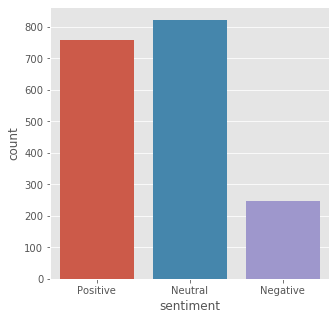

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

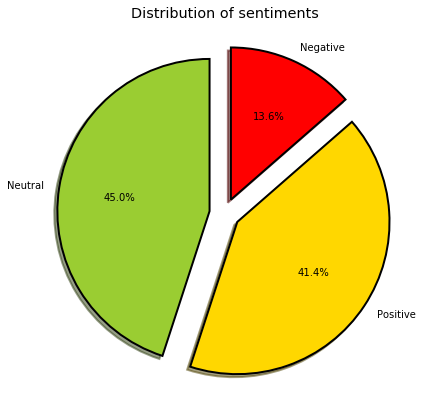

In [28]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [29]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text  polarity  \
1377         since ’ end ipod best ipod color made ipod       1.0   
44    rip ipod ... , best music player carving pumpk...       1.0   
441   apple discontinuing ipod bringing sorts feels ...       1.0   
1719  apple might consider ipod obsolete still use i...       1.0   
1062  ipods discontinued forgot ipod shuffle perfect...       1.0   

      subjectivity sentiment  
1377           0.3  Positive  
44             0.3  Positive  
441            1.0  Positive  
1719           1.0  Positive  
1062           1.0  Positive

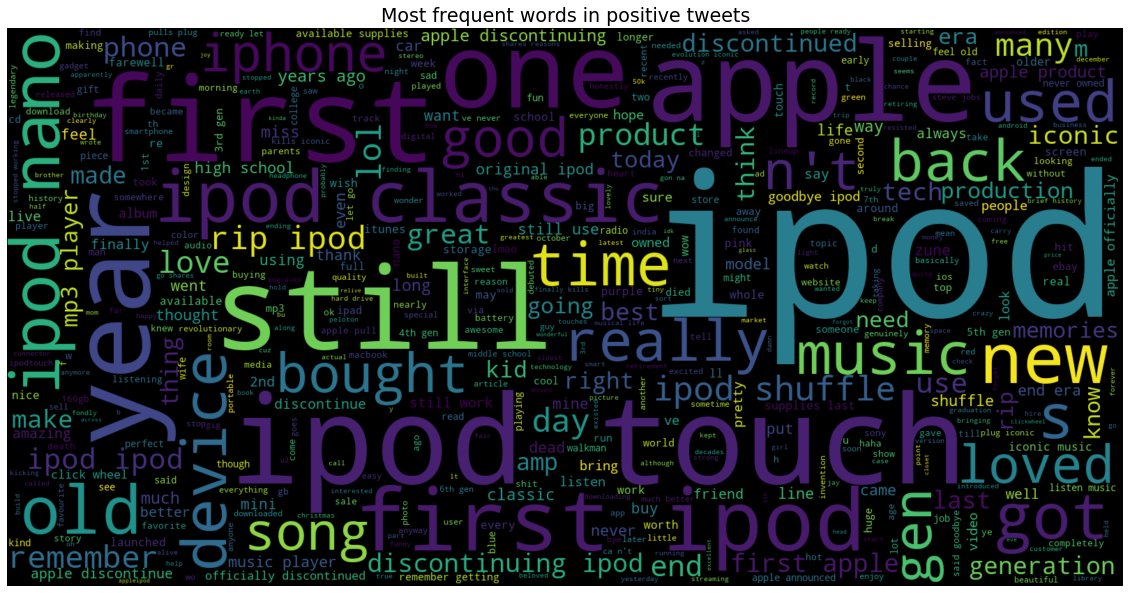

In [30]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [31]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text  polarity  \
621   ipod shuffle 9 thought rich little green squar... -0.004167   
1327                              long live pink ipod . -0.004545   
339   read apple discontinuing ipod ... . mean peopl... -0.006250   
764   unfortunate many parents ’ afford get small ch... -0.012500   
1734  people really acting like ipod first hard driv... -0.013889   

      subjectivity sentiment  
621       0.516667  Negative  
1327      0.400000  Negative  
339       0.393750  Negative  
764       0.575000  Negative  
1734      0.291667  Negative

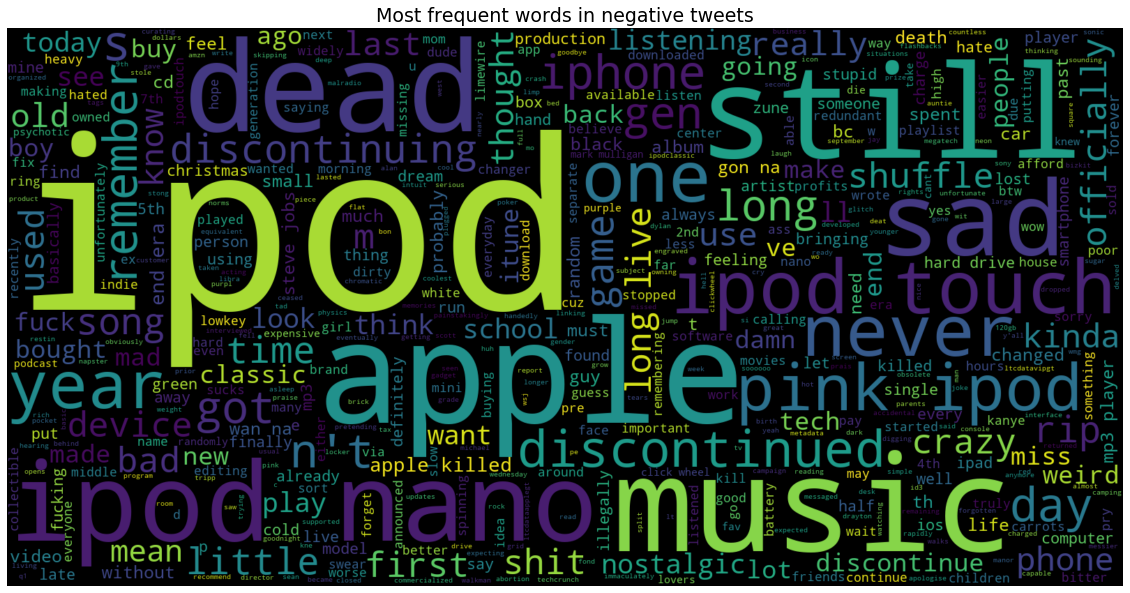

In [32]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [33]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text  polarity  \
3                                          ipod shuffle       0.0   
1306  apple dropped ipod ... .. music ears ! miimmed...       0.0   
1283  well , ’ selling like hotcakes apple ’ discont...       0.0   
1285                  apple hits ‘ skip ’ ipod theskimm       0.0   
1288                                          2007 ipod       0.0   

      subjectivity sentiment  
3              0.0   Neutral  
1306           0.0   Neutral  
1283           0.0   Neutral  
1285           0.0   Neutral  
1288           0.0   Neutral

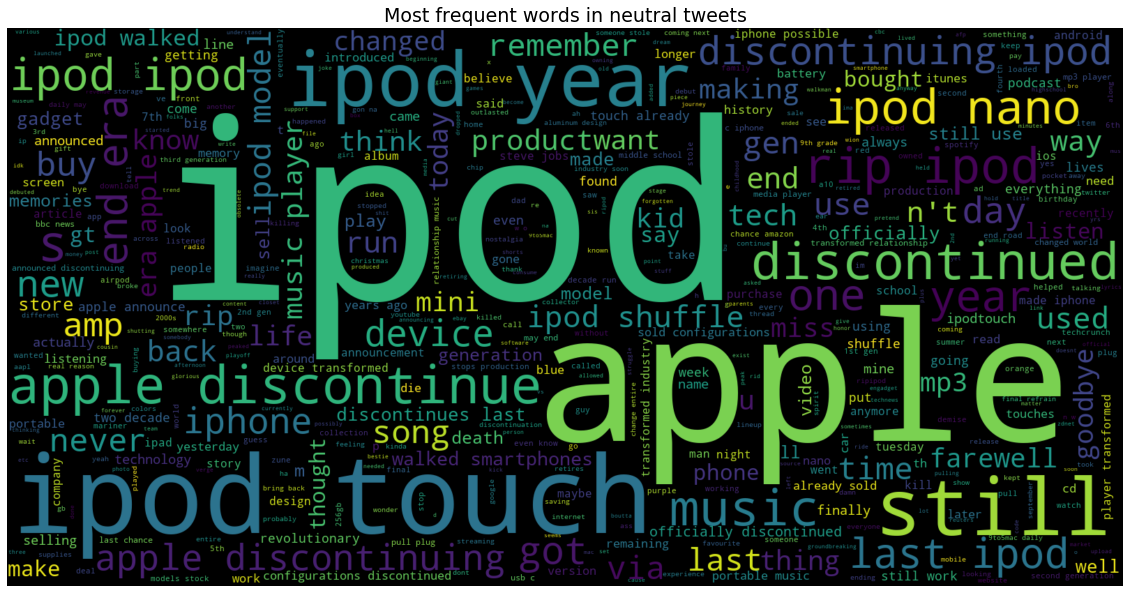

In [34]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

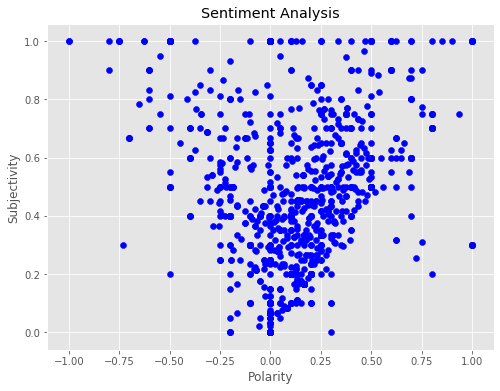

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['polarity'].values,text_df['subjectivity'].values,color="Blue")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [36]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [37]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 13304

First 20 features:
 ['000', '000 awesome', '000 songs', '000 tracks', '05', '05 11', '05 one', '07', '07 08', '08', '08 ish', '09', '09 also', '09 twas', '10', '10 ads', '10 all', '10 cassette', '10 put', '10 views']


In [38]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1278, 13304)
Size of y_train: (1278,)
Size of x_test: (549, 13304)
Size of y_test: (549,)


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print(logreg_acc)

0.7340619307832422


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 16  52  13]
 [  1 232   7]
 [  5  68 155]]


              precision    recall  f1-score   support

    Negative       0.73      0.20      0.31        81
     Neutral       0.66      0.97      0.78       240
    Positive       0.89      0.68      0.77       228

    accuracy                           0.73       549
   macro avg       0.76      0.61      0.62       549
weighted avg       0.76      0.73      0.71       549



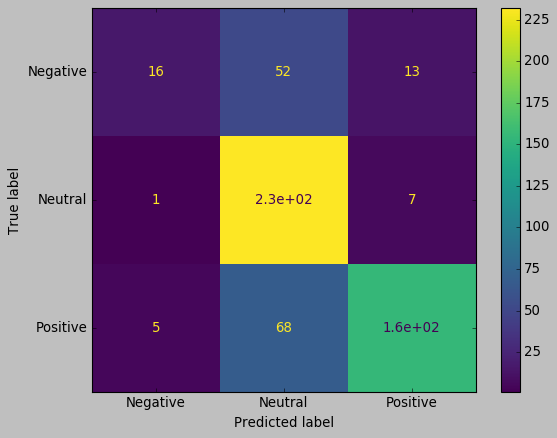

In [45]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [46]:
dt=DecisionTreeClassifier(max_depth = 6,random_state = 0,criterion = "entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
dtp = dt.predict(x_test)

In [48]:
print(accuracy_score(dtp,y_test))

0.5956284153005464


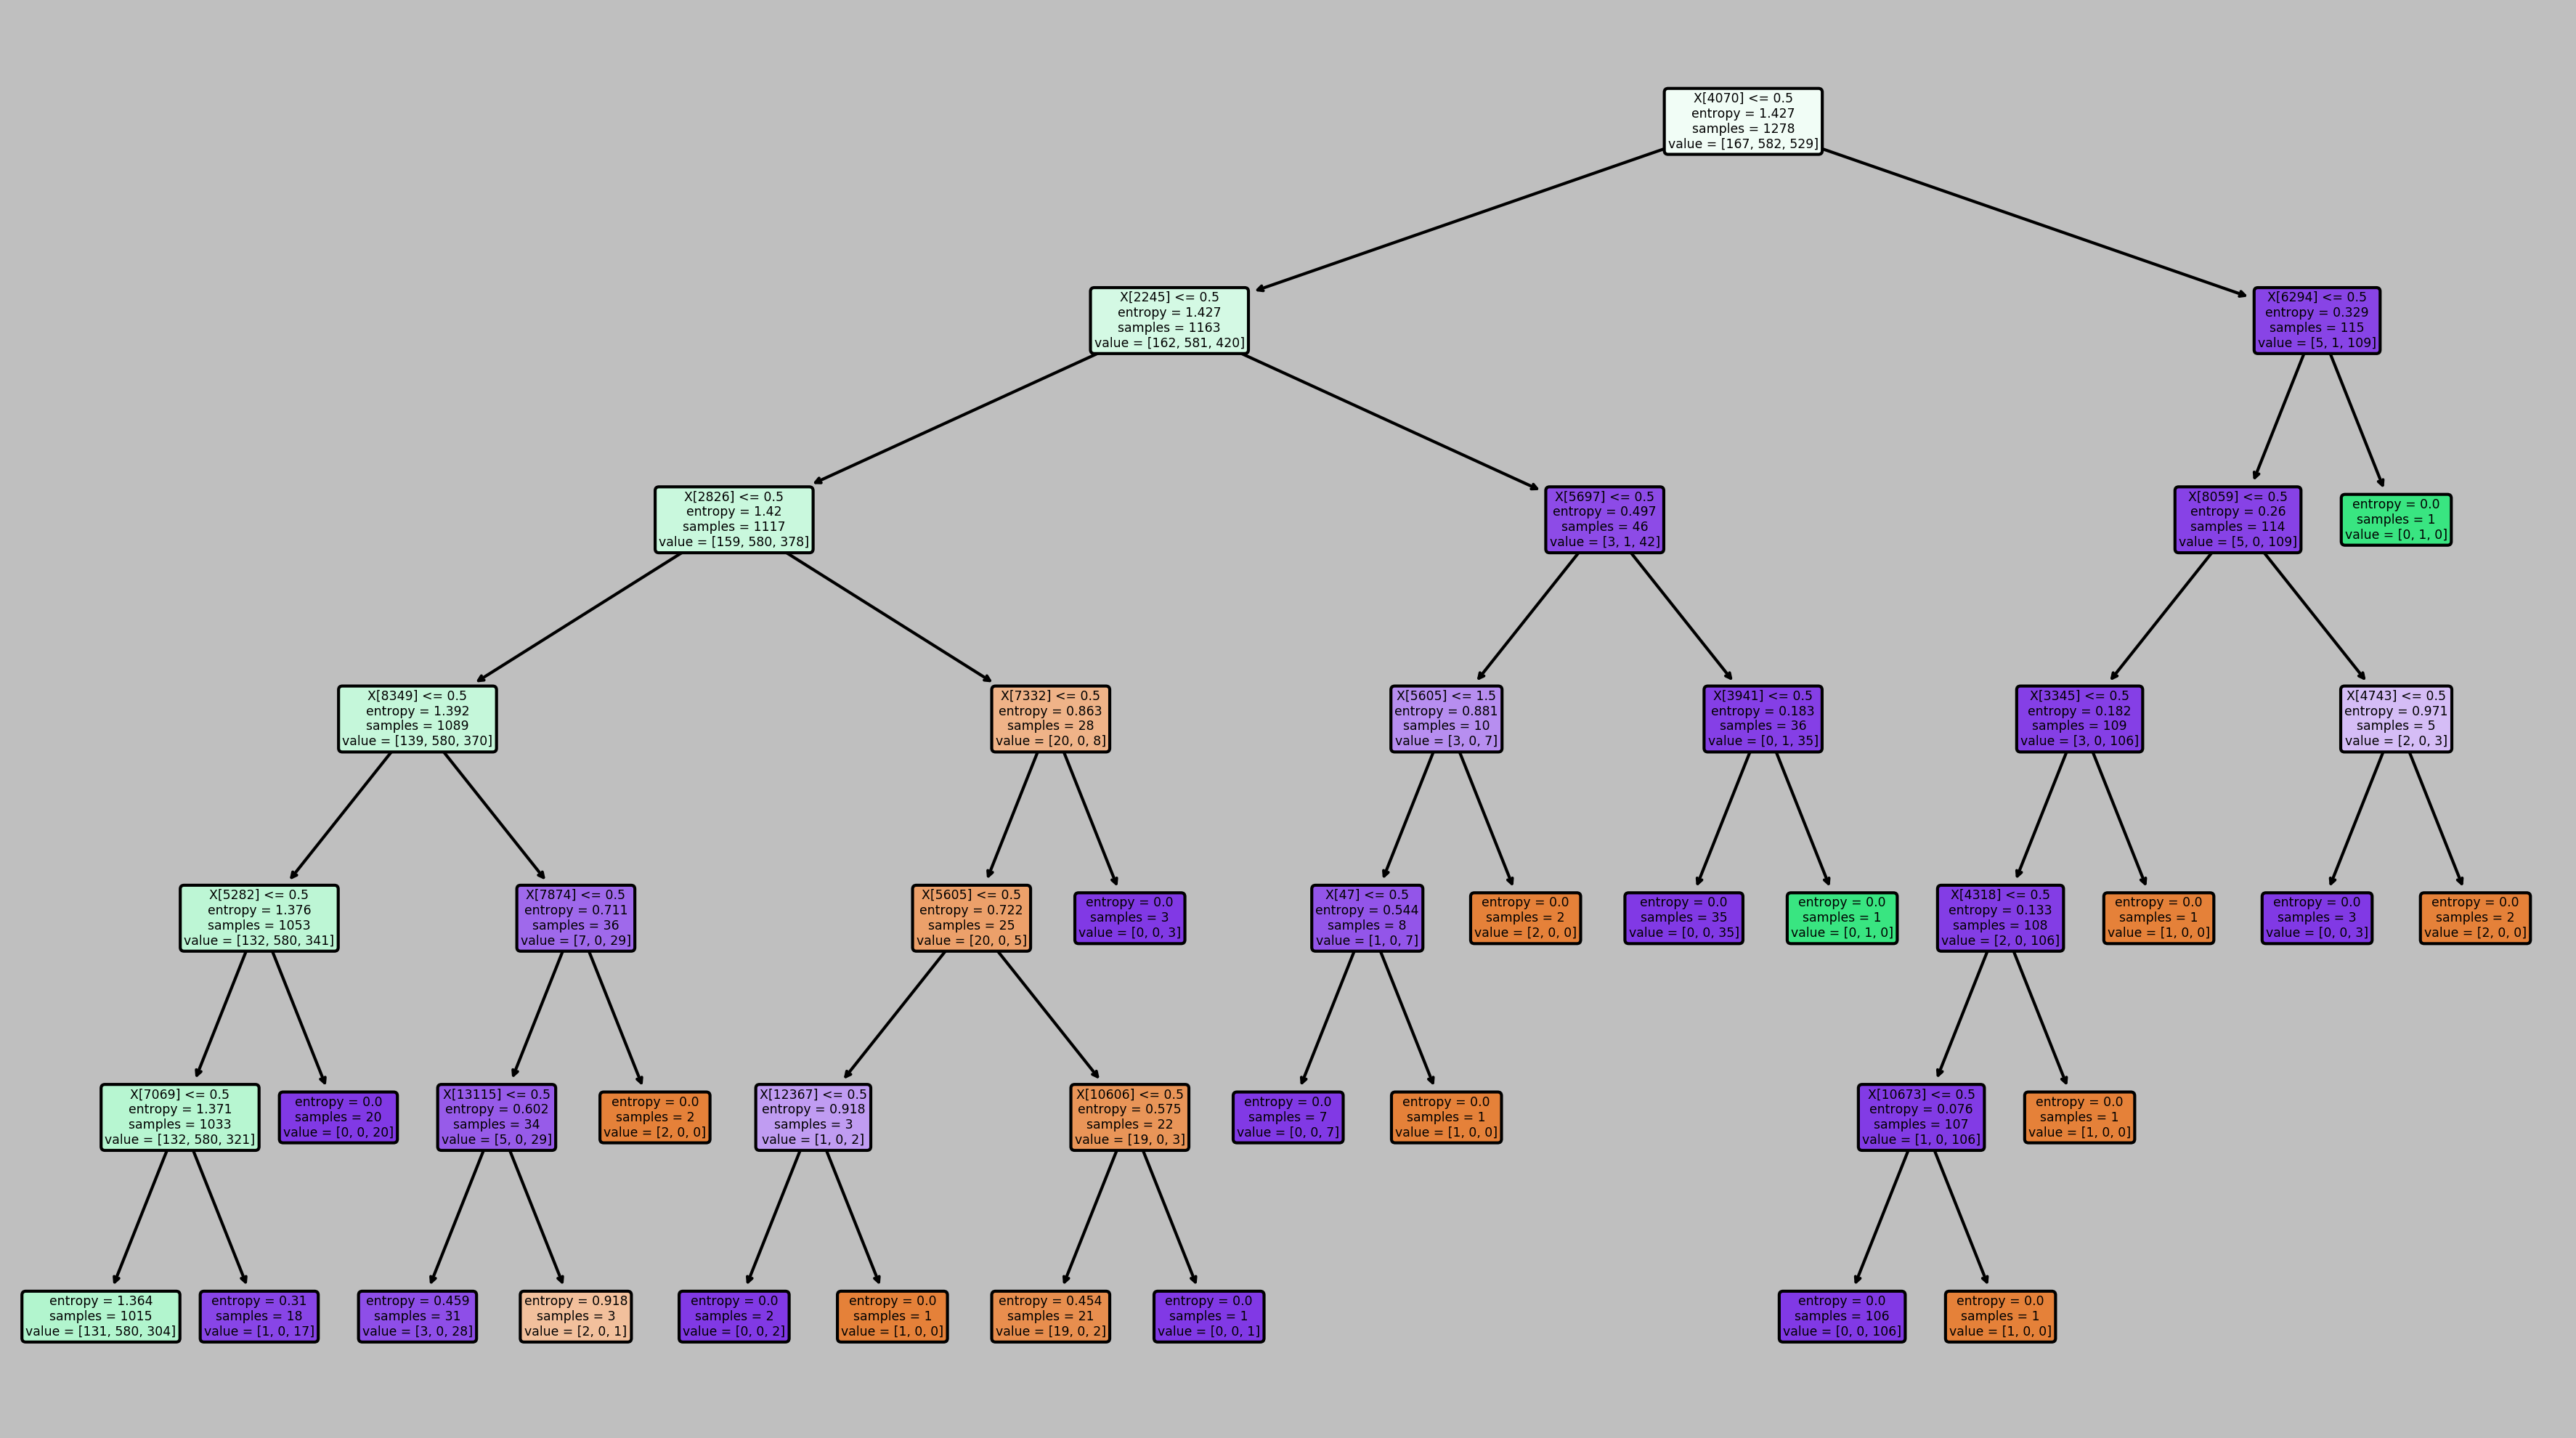

In [49]:
from sklearn import tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300) 
tree.plot_tree(dt,filled = True,rounded=True);

In [50]:
print(confusion_matrix(y_test, dtp))
print("\n")
print(classification_report(y_test, dtp))

[[  5  72   4]
 [  0 239   1]
 [  4 141  83]]


              precision    recall  f1-score   support

    Negative       0.56      0.06      0.11        81
     Neutral       0.53      1.00      0.69       240
    Positive       0.94      0.36      0.53       228

    accuracy                           0.60       549
   macro avg       0.68      0.47      0.44       549
weighted avg       0.70      0.60      0.54       549



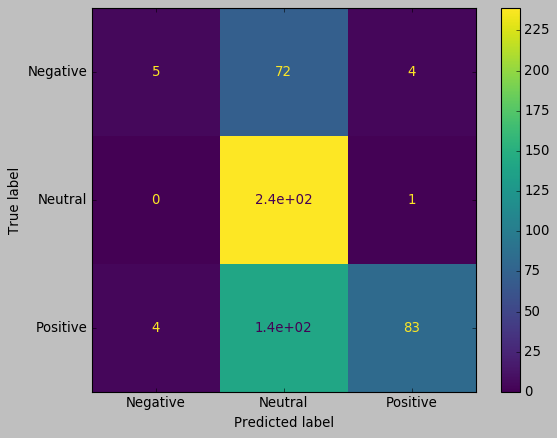

In [51]:
style.use('classic')
cm = confusion_matrix(y_test, dtp)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
disp.plot()

In [52]:
SVCmodel = SVC()
SVCmodel.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
svc_acc

0.6721311475409836

In [54]:
svc_pred[0]

'Positive'

In [55]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  5  32  44]
 [  0 196  44]
 [  0  60 168]]


              precision    recall  f1-score   support

    Negative       1.00      0.06      0.12        81
     Neutral       0.68      0.82      0.74       240
    Positive       0.66      0.74      0.69       228

    accuracy                           0.67       549
   macro avg       0.78      0.54      0.52       549
weighted avg       0.72      0.67      0.63       549



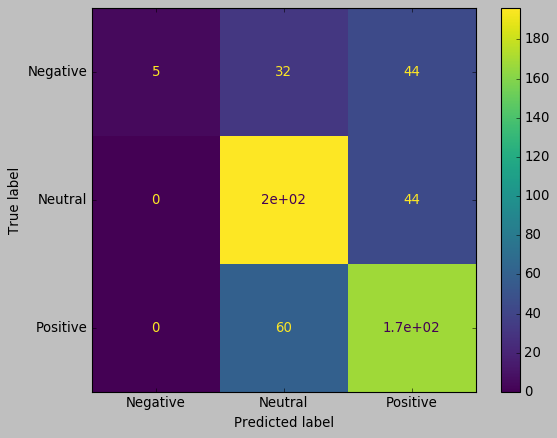

In [56]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

In [57]:
print(accuracy_score(svc_pred,y_test))

0.6721311475409836


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid_parameters = {'C': [0.001,0.1,1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [60]:
grid = GridSearchCV(SVC(),grid_parameters,verbose=1)

In [62]:
grid.fit(x_train,y_train.values.ravel())

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   46.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [63]:
grid_predictions = grid.predict(x_test)

In [64]:
print(accuracy_score(grid_predictions,y_test))

0.7413479052823315


In [65]:
print(confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

[[ 25  38  18]
 [  3 222  15]
 [  6  62 160]]


              precision    recall  f1-score   support

    Negative       0.74      0.31      0.43        81
     Neutral       0.69      0.93      0.79       240
    Positive       0.83      0.70      0.76       228

    accuracy                           0.74       549
   macro avg       0.75      0.65      0.66       549
weighted avg       0.75      0.74      0.73       549



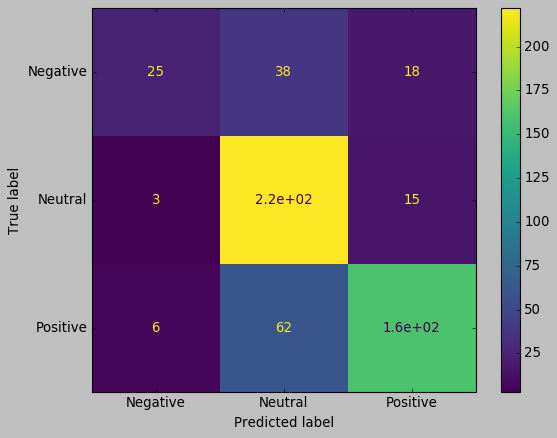

In [66]:
style.use('classic')
cm = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

In [ ]:
print("enter the sentence: ")
s = input()

In [ ]:
tdf = pd.DataFrame({"text":[s]})

In [ ]:
tdf

In [ ]:
tdf['text'] = tdf['text'].apply(data_processing)

In [ ]:
tdf['text'] = tdf['text'].apply(lambda x: stemming(x))

In [ ]:
tdf

In [ ]:
tdf['polarity'] = tdf['text'].apply(polarity)

In [ ]:
tdf['subjectivity'] = tdf['text'].apply(subjectivity)

In [ ]:
tdf['sentiment'] = tdf['polarity'].apply(sentiment)

In [ ]:
tdf

In [ ]:
tdf_x = tdf['text']
print(tdf_x)
tdf_x = vect.transform(tdf)

In [ ]:
print(tdf_x)

In [ ]:
print(logreg.predict(tdf_x)[0])

In [ ]:
print(dt.predict(tdf_x)[0])